In [776]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sbn

In [777]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [778]:
dataFrame.head() ## Başlık gibi ilk 4 tanesini getiriyo

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [779]:
pd.DataFrame(dataFrame)

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


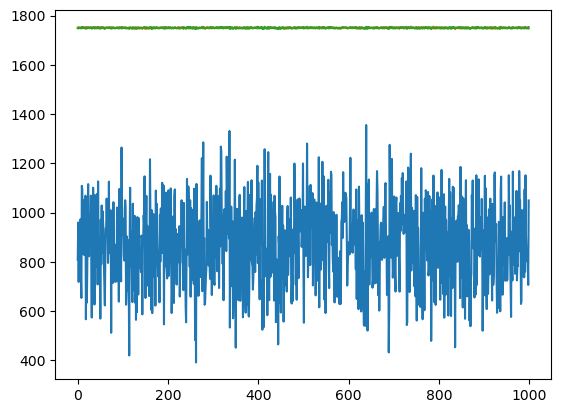

In [780]:
plt.plot(dataFrame)

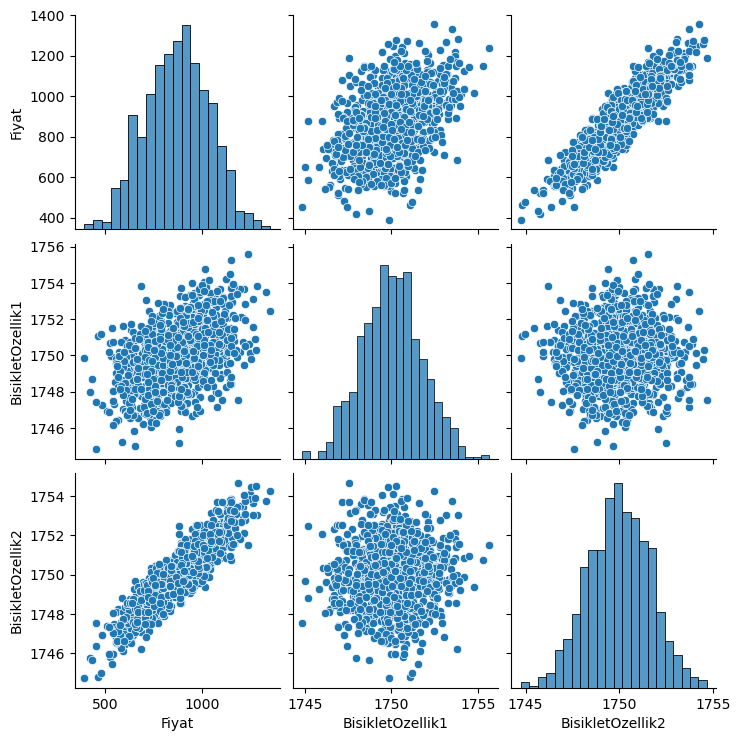

In [781]:
sbn.pairplot(dataFrame)

## Veriyi train/test olarak ikiye ayırma


In [783]:
from sklearn.model_selection import train_test_split

In [784]:
# y = wx + b
# y = label(fiyat)
# w = weight
y = dataFrame["Fiyat"].values

# x = feature(özellik)

x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

In [785]:
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [786]:
x_train.shape

(670, 2)

## Scaling

In [788]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

In [789]:
scaler = MinMaxScaler()

In [790]:
scaler.fit(x_train)


MinMaxScaler()

In [791]:
x_train = scaler.transform(x_train)

In [792]:
x_test = scaler.transform(x_test)

## Model Oluşturma

In [794]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model

In [795]:
model = Sequential()
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer = "rmsprop", loss = "mse")
# modele ara nöronları veriyoruz output veriyoruz


In [796]:
model.fit(x_train,y_train,epochs = 250) ## modeli train ediyoruz epoch ne kdr çalışacağı

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 806314.3750
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 799867.0625
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 774048.5625
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 797696.3750
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 791576.9375
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 798588.0625
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 781004.3125
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 804636.7500
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 807443.7500
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 786200.3125
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 803342.6875
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 789110.2500
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 785305.8750
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 301u

In [797]:
loss = model.history.history["loss"]

<Axes: >

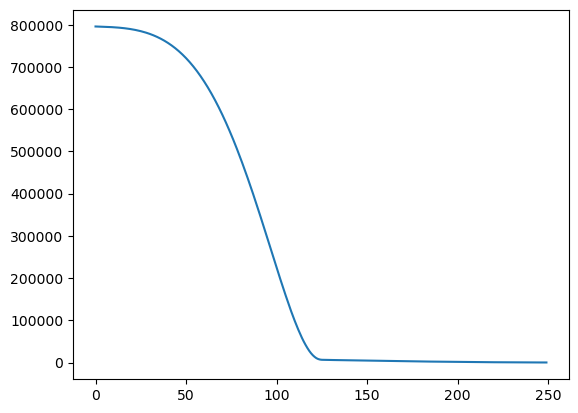

In [798]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [799]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)

In [800]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [801]:
trainLoss

152.61514282226562

In [802]:
testLoss

147.5865020751953

In [803]:
## Kayıpları kontrol ettik

## Tahmin etme


In [805]:
dataTahmin = model.predict(x_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [806]:
deneme1 = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [807]:
deneme1

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [808]:
dataTahmin = pd.Series(dataTahmin.reshape(330,))

# Yeni bir DataFrame oluşturup tahminleri ekleyelim
df_tahminler = pd.DataFrame({'Tahmin Y': dataTahmin})

In [809]:
sonuc = pd.concat([deneme1,dataTahmin],axis=1)

In [810]:
sonuc.columns = ["Gerçek Y","Tahmin Y"]

In [811]:
sonuc

,Gerçek Y,Tahmin Y
0,1081.652164,1067.211548
1,622.675990,636.733765
2,889.356810,875.685242
3,902.826733,895.116211
4,897.662404,900.475464
...,...,...
325,1028.438035,1005.919006
326,789.934950,796.652771
327,758.490486,771.040039
328,1172.871659,1151.700195


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

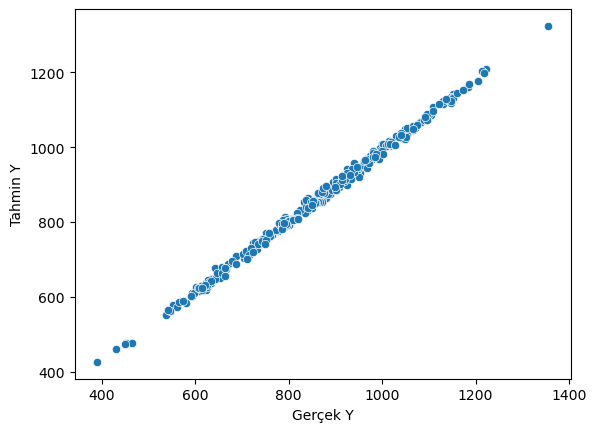

In [812]:
sbn.scatterplot(x = "Gerçek Y",y= "Tahmin Y",data=sonuc)

In [813]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [814]:
mean_absolute_error(sonuc["Gerçek Y"],sonuc["Tahmin Y"])

9.865491140113633

In [815]:
sonuc.describe()

,Gerçek Y,Tahmin Y
count,330.000000,330.000000
mean,863.895735,863.177063
std,164.649126,155.948257
min,390.856887,426.032562
25%,745.553041,751.474640
50%,878.239496,877.183380
75%,979.817018,972.151749
max,1355.213745,1323.901367


## Yeni Fiyat Tahmin Ettirme

In [904]:
yeniBisikletOzellikleri = [[1753,1752]]
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [906]:
model.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[1154.8434]], dtype=float32)

## Modeli Kaydetme ve Çağırma


In [890]:
from keras.models import load_model

In [892]:
model.save("BisikletFiyatAnalizi.keras")

In [894]:
yeniModell = load_model("BisikletFiyatAnalizi.keras")

In [898]:
yeniModell.predict(yeniBisikletOzellikleri)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[1154.8434]], dtype=float32)